In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
from scipy.optimize import minimize
import nevergrad as ng

## Data

In [87]:
df = pd.DataFrame(columns=['Pressure','Temprerature','Speed','ProductionYield'])

In [88]:
df['Pressure'] = np.random.randint(10, high=20, size=2000)
df['Temprerature'] = np.random.uniform(low=20, high=32, size=2000)
df['Speed'] = np.random.uniform(low=2, high=10, size=2000)
df['ProductionYield'] = np.sqrt(df['Pressure'])/(df['Temprerature']**2) * np.sin(df['Speed']) *1000 + 10

In [89]:
df.head()

,Pressure,Temprerature,Speed,ProductionYield
0,14,21.077098,7.408960,17.602182
1,12,21.717489,4.871052,2.747599
2,13,23.695634,4.663268,3.586268
3,18,25.368720,9.977954,6.536442
4,11,23.998678,5.624135,6.473590


In [90]:
df.describe()

,Pressure,Temprerature,Speed,ProductionYield
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,14.485000,25.976663,5.953473,10.119195
std,2.866685,3.442751,2.245317,4.132489
min,10.000000,20.000268,2.003725,-0.750695
25%,12.000000,23.055898,4.053185,6.733475
50%,14.000000,26.165888,5.953639,10.315200
75%,17.000000,28.869403,7.818141,13.512762
max,19.000000,31.999220,9.994920,20.507945


## Prediction algorithm

In [91]:
x_train, x_test, y_train, y_test = train_test_split(df[['Pressure','Temprerature','Speed']].values, df['ProductionYield'].values, test_size=0.33, random_state=42)

In [92]:
def build_model():
    
    # create model
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [93]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 15])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [94]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_15 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 82,945
Trainable params: 82,945
Non-trainable params: 0
_________________________________________________________________


In [95]:
history = model.fit(
                    x_train, y_train,
                    validation_split=0.2,
                    verbose=2, epochs=1000)

Epoch 1/1000
34/34 - 1s - loss: 40.8175 - val_loss: 23.0176
Epoch 2/1000
34/34 - 0s - loss: 17.1479 - val_loss: 18.2577
Epoch 3/1000
34/34 - 0s - loss: 16.4343 - val_loss: 18.2003
Epoch 4/1000
34/34 - 0s - loss: 16.1167 - val_loss: 18.2886
Epoch 5/1000
34/34 - 0s - loss: 15.8290 - val_loss: 17.3067
Epoch 6/1000
34/34 - 0s - loss: 15.6510 - val_loss: 18.9078
Epoch 7/1000
34/34 - 0s - loss: 15.3508 - val_loss: 16.7839
Epoch 8/1000
34/34 - 0s - loss: 15.3457 - val_loss: 17.6779
Epoch 9/1000
34/34 - 0s - loss: 15.2745 - val_loss: 17.9680
Epoch 10/1000
34/34 - 0s - loss: 15.1785 - val_loss: 17.7708
Epoch 11/1000
34/34 - 0s - loss: 15.1128 - val_loss: 17.4327
Epoch 12/1000
34/34 - 0s - loss: 14.7594 - val_loss: 16.6262
Epoch 13/1000
34/34 - 0s - loss: 14.7437 - val_loss: 16.6992
Epoch 14/1000
34/34 - 0s - loss: 14.9531 - val_loss: 16.2024
Epoch 15/1000
34/34 - 0s - loss: 14.3843 - val_loss: 16.1405
Epoch 16/1000
34/34 - 0s - loss: 14.2689 - val_loss: 16.2752
Epoch 17/1000
34/34 - 0s - loss: 

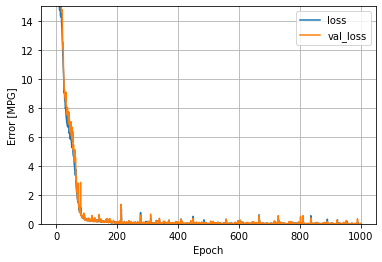

In [96]:
plot_loss(history)

In [97]:
tp_indx = 4
print(f"real value: {y_test[tp_indx]}, model predicted: {model.predict(x_test[tp_indx].reshape(1,-1))}")

real value: 10.215628782386176, model predicted: [[10.305941]]


## Multi-dimensional optimization
- scipy.optimize.minimize

In [98]:
def wrapper(x, *args) -> float:
    
    network_input = x.reshape(1,-1)

    network_output = model.predict(network_input, *args)

    scipy_output = -float(network_output)

    return scipy_output

In [113]:
x0 = x_train[-1].reshape(1,-1)
res = minimize(wrapper, x0, method='Nelder-Mead', options={'maxiter': 2000}, tol=1e-7)

In [114]:
res

 final_simplex: (array([[24.11093382, 16.95170413,  7.78629222],
       [24.11093389, 16.95170412,  7.78629222],
       [24.11093388, 16.95170412,  7.78629222],
       [24.11093384, 16.95170414,  7.78629222]]), array([-22.3163147, -22.3163147, -22.3163147, -22.3163147]))
           fun: -22.316314697265625
       message: 'Optimization terminated successfully.'
          nfev: 247
           nit: 120
        status: 0
       success: True
             x: array([24.11093382, 16.95170413,  7.78629222])

In [115]:
model.predict(res.x.reshape(1,-1))

array([[22.316315]], dtype=float32)